# Underfitting !? Seriously ?!!!

In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


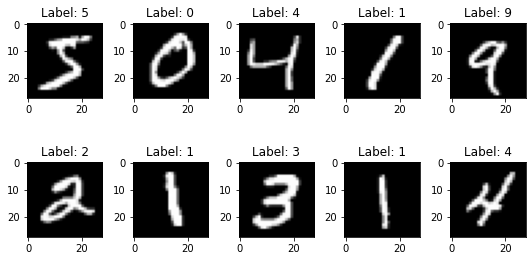

In [3]:
import matplotlib.pyplot as plt

num = 10
images = x_train[:num]
labels = np.argmax(y_train[:num], axis=1)

num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [4]:
model = keras.Sequential()

model.add( layers.Flatten( input_shape=input_shape) )
model.add( keras.layers.Dense(2, activation='relu') )
model.add( keras.layers.Dense(2, activation='relu') )
model.add( layers.Flatten() )

model.add( layers.Dense(num_classes, activation="softmax") )

2021-11-18 21:24:29.073742: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 1570      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                30        
Total params: 1,606
Trainable params: 1,606
Non-trainable params: 0
_________________________________________________________________


In [6]:
sgd = tf.keras.optimizers.SGD( learning_rate=0.02, name="SGD" )
adam = tf.keras.optimizers.Adam()


## Underfitting!

- The network is underfitting, not weird, with only 2 neurons in 3 of its layers....
- Guess first what is a reasonal amount for network to reach 80% accuracy or more
- Slowly increase untill accuracy is above 80%, is this what was your guess?


In [7]:
batch_size = 1024
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])

loss_graph = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.2)

2021-11-18 21:24:47.090161: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 150528000 exceeds 10% of free system memory.
2021-11-18 21:24:47.168482: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
47/47 [==============================] - 1s 6ms/step - loss: 2.3022 - accuracy: 0.1116 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 2.3015 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 2.3013 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 4/10
47/47 [==============================] - 0s 3ms/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 5/10
47/47 [==============================] - 0s 3ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3020 - val_accuracy: 0.1060
Epoch 8/10
47/47 [==

<AxesSubplot:>

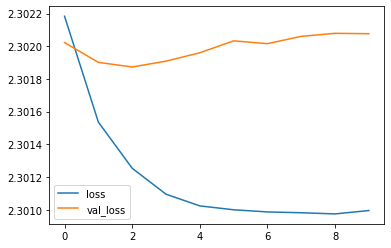

In [8]:
pd.DataFrame( loss_graph.history )[['loss', 'val_loss']].plot()

<AxesSubplot:>

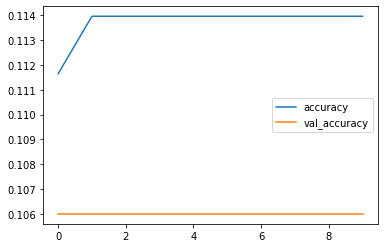

In [9]:
pd.DataFrame( loss_graph.history )[['accuracy', 'val_accuracy']].plot()

In [10]:
# accuracy on test set

np.mean( np.argmax(model.predict(x_test), axis=1) == np.argmax(y_test,axis=1) )

0.1135